In [1]:
#Recovery_rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [2]:
df=pd.read_csv("/home/rs/Downloads/global_data.csv")

In [3]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:

df1=pd.read_csv('/home/rs/Downloads/case_time_series.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             358 non-null    object
 1   Date_YMD         358 non-null    object
 2   Daily Confirmed  358 non-null    int64 
 3   Total Confirmed  358 non-null    int64 
 4   Daily Recovered  358 non-null    int64 
 5   Total Recovered  358 non-null    int64 
 6   Daily Deceased   358 non-null    int64 
 7   Total Deceased   358 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.5+ KB


In [6]:
df1.tail()


,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002
355,19 January,2021-01-19,13787,10596373,17229,10244925,161,152163
356,20 January,2021-01-20,15279,10611652,20071,10264996,152,152315
357,21 January,2021-01-21,14490,10626142,17726,10282722,161,152476


In [25]:
recovery_rate=round(df1['Total Recovered']/df1['Total Confirmed']*100,2)

In [26]:
recovery_rate

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
353    96.58
354    96.65
355    96.68
356    96.73
357    96.77
Length: 358, dtype: float64

In [28]:
from statistics import mean
i=0
n=358
list1=df1['Total Confirmed']
list2=[]
while i<=n:
    list2.append(round(mean(list1[i:i+15])))
    i+=15
print(list2) 
print(type(list2)  )

recovery_r=[]
j=0
for i in range(n):
    if i %15 != 0 or i == 0:
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))
    elif i % 15 == 0 :
        j+=1
        recovery_r.append(round(df1['Total Recovered'][i]/list2[j] * 100,2))  
print(recovery_r)

[3, 3, 42, 483, 5142, 20477, 53725, 120365, 238168, 415639, 702451, 1171794, 1920649, 2843453, 3949493, 5291275, 6531755, 7531554, 8271847, 8927807, 9530677, 9978168, 10302500, 10540536]
<class 'list'>
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33, 33.33, 33.33, 66.67, 66.67, 66.67, 66.67, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 7.14, 9.52, 9.52, 9.52, 23.81, 23.81, 2.69, 2.9, 3.11, 3.11, 4.14, 4.76, 4.76, 4.76, 5.18, 8.28, 8.9, 10.35, 15.53, 17.6, 21.12, 2.66, 2.92, 3.29, 3.71, 4.47, 5.56, 6.4, 7.66, 9.12, 10.99, 12.35, 15.29, 18.9, 21.12, 23.3, 6.67, 7.37, 8.63, 9.96, 12.04, 13.94, 15.98, 19.42, 21.34, 24.48, 26.84, 29.0, 31.86, 34.69, 37.79, 15.69, 16.86, 18.65, 20.2, 21.89, 23.91, 26.32, 28.48, 31.23, 33.29, 35.93, 39.03, 41.97, 45.52, 49.17, 23.27, 25.13, 28.46, 30.57, 32.63, 35.15, 37.74, 40.34, 43.06, 45.2, 47.93, 50.43, 53.41, 56.27, 58.9, 34.69, 36.5, 38.57, 40.2, 42.1, 

In [29]:
df2=df1
df2['Recovery_r']=recovery_r
df2['Recovery_rate']=recovery_rate
df2=df2.groupby("Date_YMD").sum()

In [30]:
df2.tail()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_rate,Recovery_r
Date_YMD,,,,,,,,
2021-01-17,13962,10572599,14513,10210569,145,151865,96.58,96.87
2021-01-18,9987,10582586,17127,10227696,137,152002,96.65,97.03
2021-01-19,13787,10596373,17229,10244925,161,152163,96.68,97.20
2021-01-20,15279,10611652,20071,10264996,152,152315,96.73,97.39
2021-01-21,14490,10626142,17726,10282722,161,152476,96.77,97.55


In [68]:
df1['Recovery_rate']=recovery_rate

In [69]:
df1.tail()

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Recovery_rate
353,17 January,2021-01-17,13962,10572599,14513,10210569,145,151865,96.575771
354,18 January,2021-01-18,9987,10582586,17127,10227696,137,152002,96.646472
355,19 January,2021-01-19,13787,10596373,17229,10244925,161,152163,96.683318
356,20 January,2021-01-20,15279,10611652,20071,10264996,152,152315,96.733251
357,21 January,2021-01-21,14490,10626142,17726,10282722,161,152476,96.768159


In [48]:
fatality_rate=round(df1['Total Deceased']/(df1['Total Confirmed']) * 100,2)

In [49]:
fatality_rate

0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
353    1.44
354    1.44
355    1.44
356    1.44
357    1.43
Length: 358, dtype: float64

In [53]:
df2['Fatality_rate']=recovery_rate
df2.tail()
df2.drop('Fatality_rate',inplace=True,axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 2020-01-30 to 2021-01-21
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Daily Confirmed  358 non-null    int64  
 1   Total Confirmed  358 non-null    int64  
 2   Daily Recovered  358 non-null    int64  
 3   Total Recovered  358 non-null    int64  
 4   Daily Deceased   358 non-null    int64  
 5   Total Deceased   358 non-null    int64  
 6   Recovery_rate    358 non-null    float64
 7   Recovery_r       358 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 35.2+ KB


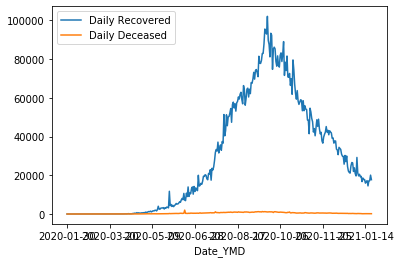

In [35]:
df2['Daily Recovered'].plot()
df2['Daily Deceased'].plot()
plt.legend()

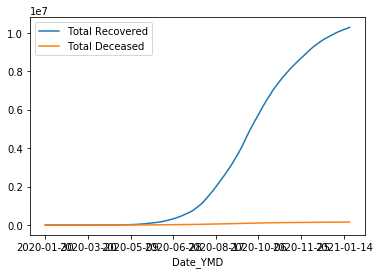

In [54]:
df2['Total Recovered'].plot()
df2['Total Deceased'].plot()
plt.legend()

In [48]:
df3=pd.read_csv('/home/rs/Downloads/states.csv')

In [49]:
df3.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
11247,2021-01-22,Tripura,33335,32888,388,23,602298.0
11248,2021-01-22,India,10626586,10283240,153069,4418,190148024.0
11249,2021-01-22,Uttar Pradesh,597823,581509,8597,0,26715060.0
11250,2021-01-22,Uttarakhand,95354,90547,1626,1305,2030241.0
11251,2021-01-22,West Bengal,566898,550244,10089,0,7751669.0


In [50]:
df4=df3
df4.drop(['Tested'],inplace=True,axis=1)

In [51]:
df4

,Date,State,Confirmed,Recovered,Deceased,Other
0,2020-01-30,Kerala,1,0,0,0
1,2020-01-30,India,1,0,0,0
2,2020-02-02,Kerala,2,0,0,0
3,2020-02-02,India,2,0,0,0
4,2020-02-03,Kerala,3,0,0,0
...,...,...,...,...,...,...
11247,2021-01-22,Tripura,33335,32888,388,23
11248,2021-01-22,India,10626586,10283240,153069,4418
11249,2021-01-22,Uttar Pradesh,597823,581509,8597,0
11250,2021-01-22,Uttarakhand,95354,90547,1626,1305


In [ ]:
fig = px.choropleth(gapminder, locations="iso_alpha", color="Recovered", hover_name="State", animation_frame="Date", range_color=[20,80])
fig.show()

In [55]:
df5=pd.read_csv('/home/rs/Downloads/state_wise_daily.csv')

In [58]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      942 non-null    object
 1   Date_YMD  942 non-null    object
 2   Status    942 non-null    object
 3   TT        942 non-null    int64 
 4   AN        942 non-null    int64 
 5   AP        942 non-null    int64 
 6   AR        942 non-null    int64 
 7   AS        942 non-null    int64 
 8   BR        942 non-null    int64 
 9   CH        942 non-null    int64 
 10  CT        942 non-null    int64 
 11  DN        942 non-null    int64 
 12  DD        942 non-null    int64 
 13  DL        942 non-null    int64 
 14  GA        942 non-null    int64 
 15  GJ        942 non-null    int64 
 16  HR        942 non-null    int64 
 17  HP        942 non-null    int64 
 18  JK        942 non-null    int64 
 19  JH        942 non-null    int64 
 20  KA        942 non-null    int64 
 21  KL        942 no

In [63]:

trial=df5.pivot_table(df5[3:42],['Date_YMD'],'Status')
trial.head()

AN                           AP                     \
Status     Confirmed Deceased Recovered Confirmed Deceased Recovered   
Date_YMD                                                               
2020-03-14         0        0         0         1        0         0   
2020-03-15         0        0         0         0        0         0   
2020-03-16         0        0         0         0        0         0   
2020-03-17         0        0         0         0        0         0   
2020-03-18         0        0         0         0        0         0   

                  AR                           AS  ...        UN        UP  \
Status     Confirmed Deceased Recovered Confirmed  ... Recovered Confirmed   
Date_YMD                                           ...                       
2020-03-14         0        0         0         0  ...         0        12   
2020-03-15         0        0         0         0  ...         0         1   
2020-03-16         0        0         0         0  ...         0         0   
2020-03-17         0        0         0         0  ...         0         2   
2020-03-18         0        0         0         0  ...         0         2   

                                     UT                           WB           \
Status     Deceased Recovered Confirmed Deceased Recovered Confirmed Deceased   
Date_YMD                                                                        
2020-03-14        0         4         0        0         0         0        0   
2020-03-15        0         0         0        0         0         0        0   
2020-03-16        0         0         1        0         0         0        0   
2020-03-17        0         1         0        0         0         1        0   
2020-03-18        0         0         1        0         0         0        0   

                      
Status     Recovered  
Date_YMD              
2020-03-14         0  
2020-03-15         0  
2020-03-16         0  
2020-03-17         0  
2020-03-18         0  

[5 rows x 117 columns]

In [64]:
df6=trial['MH']
df6.head()

Status,Confirmed,Deceased,Recovered
Date_YMD,,,
2020-03-14,14,0,0
2020-03-15,18,0,0
2020-03-16,6,0,0
2020-03-17,3,1,0
2020-03-18,3,0,0


In [79]:
llist2=list(df5.columns)
Confirmed_c=[]
for i in llist2[3:42]:
    Confirmed_c.append((trial[i]['Confirmed'] ).sum())
print(Confirmed_c)
Deceased_c=[]
for i in llist2[3:42]:
    Deceased_c.append((trial[i]['Deceased'] ).sum())
print(Deceased_c)
Recovered_c=[]
for i in llist2[3:42]:
    Recovered_c.append((trial[i]['Recovered'] ).sum())
print(Recovered_c)

[10625501, 4987, 886557, 16816, 216838, 259449, 20639, 295509, 3373, 0, 633276, 52712, 257812, 266819, 57121, 123764, 118054, 934252, 870530, 9668, 48, 252767, 2000878, 28938, 13673, 4346, 12033, 333866, 38774, 171316, 316081, 6076, 833011, 292111, 33335, 597823, 95354, 566898, 0]
[153071, 62, 7142, 56, 1082, 1468, 331, 3593, 2, 0, 10782, 757, 4371, 3000, 958, 1924, 1058, 12194, 3546, 128, 0, 3777, 50633, 367, 146, 9, 82, 1956, 643, 5535, 2756, 131, 12299, 1584, 388, 8597, 1626, 10089, 0]
[10282722, 4895, 877893, 16722, 213295, 255080, 20162, 286277, 3318, 0, 620374, 51090, 248051, 262139, 55592, 120729, 115989, 914493, 796981, 9463, 0, 244392, 1903408, 28351, 13307, 4274, 11733, 330545, 37830, 163438, 309391, 5689, 815516, 287117, 32888, 581509, 90547, 550244, 0]


In [83]:
trial2=df5.pivot_table(index='Date_YMD')

In [89]:
trial2.drop(columns=trial2[1:40],axis=1,inplace=True)

In [93]:
trial2.transpose()

Date_YMD,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2021-01-12,2021-01-13,2021-01-14,2021-01-15,2021-01-16,2021-01-17,2021-01-18,2021-01-19,2021-01-20,2021-01-21


In [94]:
trial2['States']=llist2[3:42]

ValueError: Length of values does not match length of index